## Test cases for potential problems (2D)

### Potential problems

Let an uniform closed domain $\Omega$ bounded by $S=\partial \Omega$ be a square of side $L$ with its lower left corner at the origin of the coordinate system $[x,y]$. This domain is a perfect heat conductor with an uniform constant heat conductivity $k$ $[W/(m K)]$. The heat conduction is described by the Laplace equation.

The Laplace equation, also known as the potential equation, is an elliptic partial differential equation written as

\begin{equation}
    \nabla^2 T = 0
\end{equation}
where $\nabla^2 = \partial^2 / \partial x^2 + \partial^2 / \partial y^2 + \partial^2 / \partial z^2 $ is the Laplace operator and $T$ is the temperature, for potential flows, it is the velocity potential.

Consider a square plate of size $L$ \[m\] with an uniform heat conductivity $k$ \[W/m.K\] subjected at opposite faces to a temperature of 1 K and 0 K. There is no heat transfer to the two other opposing faces ($\frac{\partial T}{\partial y} = 0 $). This means that the temperature gradient will be described only in the x direction ($\frac{\partial T}{\partial x} = \frac{d T}{d x}$ are interchangeable). Since the heat transfer is only going to occur in one direction, it's reasonable to approximate the Laplace equation to its one-dimensional form 

\begin{equation}
\frac{d^2 T}{d x^2} = 0.
\end{equation}

Integrating one time, one obtains

\begin{equation}
\int_{x=0}^{x=L} \frac{d^2 T}{d x^2} dx =\frac{d T}{d x} = -C_1,
\end{equation}
which describes a temperature distribution with a constant gradient.


A second integration gives

\begin{equation}
\int_{x=0}^{x=L} \left(\frac{d T}{d x} + C_1 \right) dx = -C_2,
\end{equation}


\begin{equation}
T(x) + C_1 x + C_2 = 0.
\end{equation}

This is a linear solution for the temperature distribution, which is reasonable for its heat conduction.

The boundary condition at $x = 0$ is $T(0) = 1$ and at $x=L$ is $T(L) =0$.

\begin{equation}
T(0) + C_1 0 + C_2 = 0,
\end{equation}
\begin{equation}
1 + C_2 = 0,
\end{equation}
therefore, $C_2 = -1$.

\begin{equation}
T(L) + C_1 L +C_2 = 0,
\end{equation}
\begin{equation}
0 + C_1 L -1 = 0,
\end{equation}
\begin{equation}
C_1 = \frac{1}{L}.
\end{equation}

So, the solution of the problem is described by the equation

\begin{equation}
T(x) = 1 - \frac{x}{L}.
\end{equation}

To verify that this equation indeed solves the Laplace, its derivatives with relationship to $x$ is

\begin{equation}
\frac{d T(x)}{d x} = - \frac{1}{L}
\end{equation}
and
\begin{equation}
\frac{d^2 T(x)}{d x^2} = 0
\end{equation}
which is the unidimensional Laplace equation.


In [2]:
# The analytical solution is very simply
T_an(x) = 1-x\L;
q_an(x) = -1\L;

----------------------------------------
#### Boundary element method formulation

The boundary element method (BEM) is obtained by solving a boundary integral equation (BIE)

\begin{equation}
    c(x') T(x') \int_S T(x) q^* (x,x') dS =  \int_S q(x) T^* (x,x') dS 
\end{equation}
where $x$ is called a 'field-point' and $x'$ is the 'source-point'. Collocation is a technique in which source-points are used as physical entities of the system while applying the boundary condition. Field-points are used thought of as being located on the boundary of the domain, while 
If the geometry is approximated by some arbitrary shape function $N(\xi)$ in parametric space $[-1<\xi<1]$, described by control points $P$,

\begin{equation}
    c(x') T(x') \int_{-1}^{1} \mathbf{T} \mathbf{N}(\xi) \mathbf{P} q^* (x', \xi)  \frac{dS}{d \xi} d \xi =  \int_{-1}^{1} \mathbf{q} \mathbf{N}(\xi) \mathbf{P} T^* (x', \xi)  \frac{dS}{d \xi} d \xi.
\end{equation}

The term $\frac{dS}{d \xi}$ is called the Jacobian of the transformation of the boundary from geometrical space to parametric space. It's related to the shape functions $N(\xi)$.

It's important to note that, even though the geometry is described by the points $P$, there are cases in which they do not reside either on the boundary or domain of the problem. 

This points, however, do not change over the boundary and can be written out of the equation. The same is true for the value of the variables $T$ and $q$ at the collocation points.

\begin{equation}
    c(x') T(x') \int_{-1}^{1} N(\xi) q^* (x', \xi)  \frac{dS}{d \xi} d \xi TP =  \int_{-1}^{1} N(\xi) T^* (x', \xi)  \frac{dS}{d \xi} d \xi qP.
\end{equation}

If the points reside on the boundary of the problem, at the center of a linear interpolation between each consecutive point, the element is called linear.

In [3]:
# First, include the module const2D
include("../src/const2D/const2D.jl")
using const2D

In [29]:
# Define the geometry
L = 1; # length of the square
k = 1; # heat conductivity of the material
fc = [0]; # no concentrated heat sources 
ne = 100; # number of elements/line segment
POINTS = [1 0 0
	  2 L 0
	  3 L L
	  4 0 L];
SEGMENTS = [1 1 2 0
	     2 2 3 0
	     3 3 4 0
	     4 4 1 0];
MESH = [1 ne
	 2 ne
	 3 ne
	 4 ne];
# BCSeg =[NE BT V] are the boundary conditions at each segment.          |                                                                                                                                      |                                                                           
#NE: element number                                                      |                                                                           
#BT: boundary condition type                                             |                                                                           
# BT = 0 if the temperature is known                                     |                                                                           
# BT = 1 if the temperature gradient is known                            |                                                                           
#V: value of boundary variable                                           |                                                                           
BCSeg = [1 1 0
	 2 0 0
	 3 1 0
	 4 0 1];
NPX = 10; # number of domain points on x and y directions
NPY = 10;
PONTOS_DOM=const2D.gera_p_in(NPX,NPY,POINTS,SEGMENTS); # generate domain points
n_pdom = size(PONTOS_DOM,1);
PONTOS_dom = zeros(n_pdom,3);
PONTOS_dom[:,2:3] = PONTOS_DOM[:,:];
for i = 1:n_pdom
    PONTOS_dom[i,1] = i;
end

In [30]:
# Format and solve the problem
NOS_GEO,NOS,ELEM,CDC,normal = const2D.format_dad(POINTS,SEGMENTS,MESH,BCSeg) # Apply the discretization technique and builds the problems matrices for the geometrical points, physical nodes, elements' connectivity and boundary conditions
nnos = size(NOS,1)  # Number of physical nodes, same as elements when using constant elements
npg=36; # Number of integration points
qsi,w = const2D.Gauss_Legendre(-1,1,npg) # Generation of the points and weights
G,H=const2D.cal_GeHpot(NOS,NOS_GEO,ELEM,k,fc,qsi,w);
A,b = const2D.aplica_CDC(G,H,CDC);
x = A\b # Solves the linear system
T,q = const2D.monta_phieq(CDC,x) # Applies the boundary conditions to return the velocity potential and flux
T_dom,qx_dom,qy_dom = const2D.domain_field(PONTOS_dom[:,2:3]',NOS_GEO[:,2:3]',T,q,ELEM[:,2:3]',normal,k); # Evaluates the value at domain points

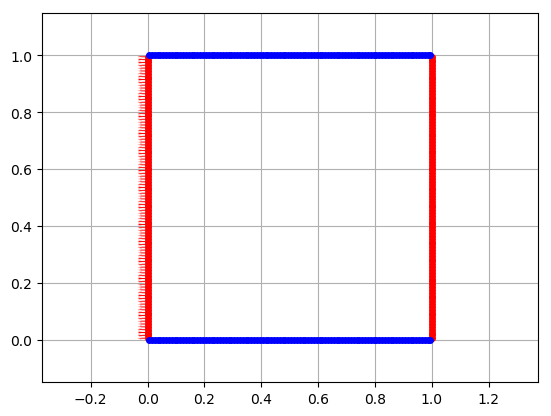

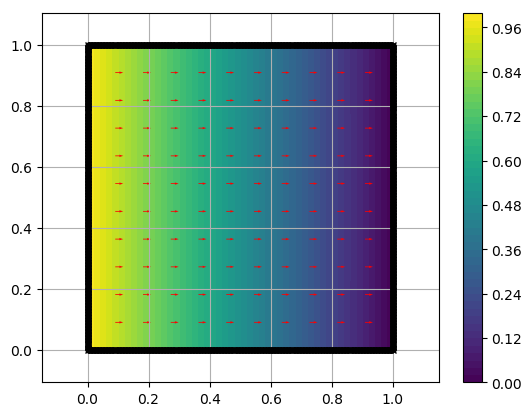

In [31]:
## Now, let's visualize the results
tipoCDC = zeros(Bool,size(CDC,1));
tipoCDC[:] = CDC[:,2];
valorCDC = CDC[:,3];
const2D.mostra_problema(ELEM[:,2:3],NOS_GEO[:,2:3],NOS[:,2:3],tipoCDC,valorCDC,normal,T,q);
const2D.mostra_heatmap(NOS[:,2:3],PONTOS_dom[:,2:3],real.(T),real.(T_dom),NOS_GEO[:,2:3],ELEM[:,2:3],qx_dom,qy_dom);

The temperature obtained using the BEM is shown as is the position of the physical point, from which the analytical solution becomes obvious.

In [32]:
i=1; f = i+ne;
println("Temp --- x coord --- T+x --- (T+x-1)*100")
[abs.(T[i:f,:]) abs.(NOS[i:f,2]) abs.(T[i:f,:]+NOS[i:f,2]) abs.((T[i:f,:]+NOS[i:f,2]-1)*100)]

101×4 Array{Float64,2}:
 0.995291    0.005  1.00029   0.0290929 
 0.985191    0.015  1.00019   0.0191174 
 0.975145    0.025  1.00015   0.0145306 
 0.965119    0.035  1.00012   0.0119084 
 0.955102    0.045  1.0001    0.0101841 
 0.945089    0.055  1.00009   0.00894612
 0.93508     0.065  1.00008   0.00800316
 0.925073    0.075  1.00007   0.00725393
 0.915066    0.085  1.00007   0.00663948
 0.905061    0.095  1.00006   0.00612296
 0.895057    0.105  1.00006   0.00568012
 0.885053    0.115  1.00005   0.00529423
 0.87505     0.125  1.00005   0.00495339
 ⋮                                      
 0.104943    0.895  0.999943  0.00568012
 0.0949388   0.905  0.999939  0.00612296
 0.0849336   0.915  0.999934  0.00663948
 0.0749275   0.925  0.999927  0.00725393
 0.06492     0.935  0.99992   0.00800316
 0.0549105   0.945  0.999911  0.00894612
 0.0448982   0.955  0.999898  0.0101841 
 0.0348809   0.965  0.999881  0.0119084 
 0.0248547   0.975  0.999855  0.0145306 
 0.0148088   0.985  0.999809  0.0

In [33]:
# Solve using H-Matrices with Lagrange polynomial approximation
include("../src/const2D/const2D.jl")
using const2D
hT,hqx,hqy,hTi = const2D.solvepotH([NOS_GEO,NOS,ELEM,CDC], PONTOS_dom, fc, BCSeg, k);
hT

400-element Array{Complex{Float64},1}:
  1.00006+0.0im
 0.989718+0.0im
 0.978821+0.0im
 0.967946+0.0im
 0.957189+0.0im
 0.946578+0.0im
 0.936128+0.0im
 0.925851+0.0im
  0.91576+0.0im
 0.905861+0.0im
 0.896163+0.0im
 0.886673+0.0im
 0.877394+0.0im
         ⋮     
      1.0+0.0im
      1.0+0.0im
      1.0+0.0im
      1.0+0.0im
      1.0+0.0im
      1.0+0.0im
      1.0+0.0im
      1.0+0.0im
      1.0+0.0im
      1.0+0.0im
      1.0+0.0im
      1.0+0.0im

Temp --- x coord --- T+x --- (T+x-1)*100


Now that the two solvers were tested, a speed and accuracy analysis will be carried out.

In [44]:
ne_min = 20; ne_max = 100; steps = 100; ne = linspace(ne_min,ne_max,steps);
error = zeros(steps)
for i = 1:steps
    MESH = [1 round(Int,ne[i])
        2 round(Int,ne[i])
        3 round(Int,ne[i])
        4 round(Int,ne[i])];
    T,qx,qy,Ti = const2D.solvepot([NOS_GEO,NOS,ELEM,CDC],PONTOS_dom,fc,BCSeg,k)
    hT,hqx,hqy,hTi = const2D.solvepotH([NOS_GEO,NOS,ELEM,CDC], PONTOS_dom, fc, BCSeg, k); 
    error[i] = sqrt(sum(abs.(T.*T-hT.*hT)))
end

In [45]:
error

100-element Array{Float64,1}:
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937
 ⋮      
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937
 6.47937

### Linear discontinuous elements

Another commonly used element is the linear discontinuous element, which will be called hereforth 'desclin'. 

In [13]:
include("../src/desclin2D/desclin2D.jl")

desclin2D

In [14]:
T,q = desclin2D.solve([NOS_GEO,NOS,ELEM,CDC],PONTOS_dom,fc,BCSeg,k)

LoadError: [91mBoundsError: attempt to access 80×3 Array{Float64,2} at index [1, 5][39m

Building A and b matrices using the traditional colocation BEM for constant elements.
Evaluating matrices H, G and array q


In [11]:
typeof(ELEM)

Array{Int64,2}

### Quadratic discontinuous elements

### NURBS elements

In [10]:
# First, include the module const2D
include("../src/nurbs2D/nurbs2D.jl")
using nurbs2D

In [13]:
# Characteristics of the problem: Square domain with imposed temperature in two opposite faces and imposed null temperature flux at the other two faces. 
L=1;
PONTOS = [1 0 0
	  2 L 0
	  3 L L
	  4 0 L];
SEGMENTOS = [1 1 2 0
	     2 2 3 0
	     3 3 4 0
	     4 4 1 0];
ne = 4;
MALHA = [1 ne
	 2 ne
	 3 ne
	 4 ne];
CCSeg = [1 1 0
	 2 0 1
	 3 1 0
	 4 0 0];
crv,contorno = nurbs2D.format_dad_iso(PONTOS,SEGMENTOS,MALHA)
dcrv=map(x->nurbs2D.nrbderiv(x),crv)
n = length(crv);	# N�mero total de elementos
  p=1;#refinamento p
  for i=1:n
      degree=crv[i].order-1
      #	println(crv[i].knots)
      #	println(crv[i].coefs)
      coefs,knots = nurbs2D.bspdegelev(degree,crv[i].coefs,crv[i].knots,p)
      #	println(knots)
      #	println(coefs)
      crv[i] = nurbs2D.nrbmak(coefs,knots)
  end
  h=10;#refinamento h
  for i=1:n
    novosnos=linspace(0,1,h+2)
    degree=crv[i].order-1
    coefs,knots = nurbs2D.bspkntins(degree,crv[i].coefs,crv[i].knots,novosnos[2:end-1])
    crv[i] = nurbs2D.nrbmak(coefs,knots)
  end
z=0;
for k=1:n
	for i=1:crv[k].number
		z=z+1
	end
end
numcurva=zeros(Integer,z)
collocPts=zeros(z)
CDC=zeros(z,3)
collocCoord=zeros(z,3)
z=0;
nnos=zeros(Integer,n)
for k=1:n
	p=crv[k].order-1;
	nnos[k]=crv[k].number;
	valorCDC=CCSeg[k,3];
	tipoCDC=CCSeg[k,2];
	for i=1:crv[k].number
		z=z+1;
		numcurva[z]=k;
		collocPts[z]=sum(crv[k].knots[(i+1):(i+p)])/p;
		if(i==2)
			collocPts[z-1]=(collocPts[z]+collocPts[z-1])/2;
		end
		if(i==nnos[k])
			collocPts[z]=(collocPts[z]+collocPts[z-1])/2;
		end

		CDC[z,:] = [z,tipoCDC,valorCDC];
	end
end
nnos2=cumsum([0 nnos'],2);

E=zeros(length(collocPts),length(collocPts));
for i=1:length(collocPts)
	collocCoord[i,:]=nurbs2D.nrbeval(crv[numcurva[i]], collocPts[i]);
	B, id = nurbs2D.nrbbasisfun(crv[numcurva[i]],collocPts[i])
	E[i,id+nnos2[numcurva[i]]]=B
end
k=1; # Heat conductivity

LoadError: [91mMethodError: no method matching start(::nurbs2D.Curve)[0m
Closest candidates are:
  start([91m::SimpleVector[39m) at essentials.jl:258
  start([91m::Base.MethodList[39m) at reflection.jl:560
  start([91m::ExponentialBackOff[39m) at error.jl:107
  ...[39m

In [12]:
#Building the problems matrices
H, G = nurbs2D.calcula_iso_POT(collocCoord,nnos2,crv,dcrv,E,k) # Influence matrices
A,b= nurbs2D.aplica_CDCiso(G,H,CDC,E);	# Applying boundary conditions
x=A\b; # Evaluating unknown values
Tc,qc=nurbs2D.monta_Teqiso(CDC,x); # Separating temperature from flux
# Applying NURBS basis functions to the values of temperature and flux
T=E*Tc;
q=E*qc;

# Domain points
PONTOS_int = [1 0.5 0.5]
fc = 0; finc = 0;
Hp,Gp,phi_pint = nurbs2D.calc_phi_pint_nurbs_POT(PONTOS_int,collocCoord,nnos2,crv,dcrv,k,Tc,qc);

LoadError: [91mUndefVarError: collocCoord not defined[39m

In [7]:
# Graphics
nurbs2D.mostra_geo(crv)
nurbs2D.PyPlot.plot(collocCoord[:,1],collocCoord[:,2],marker="s",markersize=10,linestyle="none",color="blue",label = "Physical points (Nodes)")
nurbs2D.PyPlot.axis("equal")
nurbs2D.PyPlot.grid(1)
nurbs2D.PyPlot.xlabel("x",fontsize="12.0")
nurbs2D.PyPlot.ylabel("y",fontsize="12.0")
nurbs2D.PyPlot.title("NURBS model",fontsize="16.0")
nurbs2D.PyPlot.legend(fontsize="14.0",loc="best")

LoadError: [91mMethodError: no method matching start(::nurbs2D.Curve)[0m
Closest candidates are:
  start([91m::SimpleVector[39m) at essentials.jl:258
  start([91m::Base.MethodList[39m) at reflection.jl:560
  start([91m::ExponentialBackOff[39m) at error.jl:107
  ...[39m

In [8]:
const2D.mostra_heatmap(collocCoord[:,1:2],real.(T),ELEM)
ncont=size(contorno,1)
ncollocpoints=size(collocPts,1)
ELEM=zeros(Integer,ncollocpoints,2)
noini=1
for ii=1:ncont
  icont=contorno[ii,1]
  ncont=contorno[ii,2]
  nofim=nnos2[icont+ncont]
  indnos=collect(noini:nofim)
  ELEM[noini:nofim,1]=indnos
  ELEM[noini:nofim,2]=indnos+1
  ELEM[nofim,2]=noini
  noini=nofim+1
end

const2D.mostra_heatmap(collocCoord[:,1:2],PONTOS_int[:,2:3],real.(T),real.(phi_pint),collocCoord[:,1:2],ELEM[:,2:3],qx_dom,qy_dom);

LoadError: [91mUndefVarError: collocCoord not defined[39m

In [9]:
crv[1].coefs

LoadError: [91mMethodError: no method matching getindex(::nurbs2D.Curve, ::Int64)[39m